In [1]:
DF_PATH       = "../data/processed/1_processed_df.pkl"
FEATURES_PATH = "../data/processed/features_skills_clusters.pkl"

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageWorkedWith',
                  'DatabaseWorkedWith',
                  'WebframeWorkedWith',
                  'MiscTechWorkedWith']

EXPORT_PATH    = "../data/processed/2_cleaned_data.pkl"

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import pickle

import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

## Read & Process Data

In [84]:
#read data
preprocessd_df = pd.read_pickle(DF_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

In [85]:
preprocessd_df['DevType']

0        [Developer, desktop or enterprise applications...
1               [Developer, full-stack, Developer, mobile]
2                                                       []
3                                                       []
4                                                       []
                               ...                        
64456                                [Senior executive/VP]
64457                                                   []
64458                                                   []
64459                                                   []
64460                                                   []
Name: DevType, Length: 64461, dtype: object

In [7]:
features_df

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_14,skills_group_15,skills_group_16,skills_group_17,skills_group_18,skills_group_2,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9
0,0,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0,2,2
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64457,4,3,1,2,1,3,4,0,2,3,0,3,3,4,1,1,1,0,3
64458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64459,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [86]:
#oneh hot encoding
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binaizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binaizer.fit_transform(preprocessd_df[col]),
                             columns = binaizer.classes_,
                             index = preprocessd_df[col].index)
    encoded_dfs[col] =  encoded_df
#merge one hot encoded
encoded_dfs = pd.concat(encoded_dfs, axis=1)

## Quick Sanity Check

In [87]:
i = np.random.randint(preprocessd_df.shape[0])
#check original values
print(preprocessd_df.iloc[i][ROLE_COLS].tolist())
print(preprocessd_df.iloc[i][TECH_COLS].tolist())
print("------------------------------------------")
#processed
print(encoded_dfs.iloc[i][encoded_dfs.iloc[i]==1])
#clusetrs
print("clusters: ",features_df.iloc[i].sum())
print("skills: ",encoded_dfs.iloc[i][TECH_COLS].sum())

[[]]
[['Bash/Shell/PowerShell', 'C', 'Python'], [], [], ['Pandas']]
------------------------------------------
LanguageWorkedWith  Bash/Shell/PowerShell    1
                    C                        1
                    Python                   1
MiscTechWorkedWith  Pandas                   1
Name: 35731, dtype: int64
clusters:  4
skills:  4


## Exclude roles

In [88]:
# Exclude roles
EXCULDE_ROLES = [
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior executive/VP',
    'Product manager',
    'Engineer, site reliability']
for role in EXCULDE_ROLES:
    encoded_dfs = encoded_dfs.drop(("DevType",role), axis=1)
    

In [89]:
#check the total sample of roles
original_role_name = encoded_dfs["DevType"].sum()
original_role_name

Academic researcher                               3552
Data or business analyst                          4024
Data scientist or machine learning specialist     3988
Database administrator                            5722
DevOps specialist                                 5969
Developer, QA or test                             3947
Developer, back-end                              27228
Developer, desktop or enterprise applications    11784
Developer, embedded applications or devices       4750
Developer, front-end                             18296
Developer, full-stack                            27125
Developer, game or graphics                       2789
Developer, mobile                                 9482
Engineer, data                                    3738
Scientist                                         2086
System administrator                              5242
dtype: int64

## Filter Data

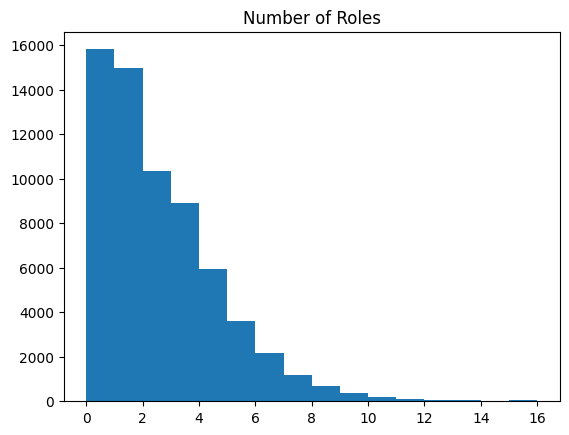

In [90]:
freq_roles = encoded_dfs[ROLE_COLS].sum(axis=1)
plt.hist(freq_roles,freq_roles.max())
plt.title('Number of Roles')
plt.show()

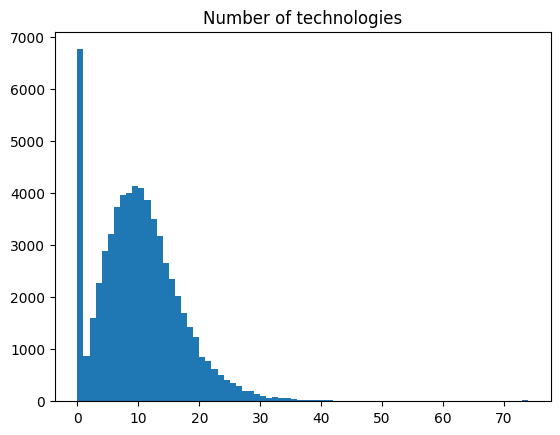

In [68]:
freq_tech = encoded_dfs[TECH_COLS].sum(axis=1)
plt.hist(freq_tech,freq_tech.max())
plt.title('Number of technologies')
plt.show()

In [91]:
# Filter frequencies 
ROLES_RANGE = [1,3]
TECH_RANGE  = [3,12]

In [92]:
# Create masks 
role_mask   = (freq_roles >= ROLES_RANGE[0]) & (freq_roles <= ROLES_RANGE[1])
tech_mask   = (freq_tech >= TECH_RANGE[0])   & (freq_tech <= TECH_RANGE[1])
filter_mask = role_mask & tech_mask

In [93]:
features_df = features_df.loc[filter_mask].copy()
encoded_dfs = encoded_dfs.loc[filter_mask].copy()

In [106]:
# Check the total samples of roles
cleaned_role_sum = encoded_dfs["DevType"].sum(axis=0)
cleaned_role_sum

Academic researcher                              1039
Data or business analyst                         1059
Data scientist or machine learning specialist    1275
Database administrator                            745
DevOps specialist                                1212
Developer, QA or test                             791
Developer, back-end                              9144
Developer, desktop or enterprise applications    2985
Developer, embedded applications or devices      1193
Developer, front-end                             5177
Developer, full-stack                            8718
Developer, game or graphics                       608
Developer, mobile                                2573
Engineer, data                                    916
Scientist                                         590
System administrator                              880
dtype: int64

In [101]:
encoded_dfs.shape

(21844, 90)

## Merge & Export data

In [107]:
# Add second level indexing 
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], 
                                                  features_df.columns])
features_df

skills_clusters                                                 \
       skills_group_0 skills_group_1 skills_group_10 skills_group_11   
0                   0              0               0               0   
1                   0              0               0               0   
5                   0              0               0               0   
7                   2              0               0               0   
8                   1              0               0               0   
...               ...            ...             ...             ...   
64416               0              0               0               0   
64422               2              0               0               0   
64428               4              0               0               0   
64447               2              0               0               0   
64453               0              0               0               0   

                                                                       \
      skills_group_12 skills_group_13 skills_group_14 skills_group_15   
0                   0               0               1               0   
1                   0               0               0               0   
5                   0               0               0               0   
7                   0               0               1               0   
8                   0               0               0               0   
...               ...             ...             ...             ...   
64416               0               0               0               0   
64422               0               0               1               0   
64428               0               0               0               0   
64447               0               0               0               0   
64453               0               0               0               0   

                                                                      \
      skills_group_16 skills_group_17 skills_group_18 skills_group_2   
0                   0               0               0              0   
1                   1               0               0              0   
5                   0               0               0              0   
7                   0               0               0              2   
8                   0               0               0              0   
...               ...             ...             ...            ...   
64416               0               0               0              0   
64422               0               0               0              3   
64428               0               0               0              1   
64447               1               0               0              0   
64453               0               1               0              0   

                                                                   \
      skills_group_3 skills_group_4 skills_group_5 skills_group_6   
0                  4              1              0              0   
1                  0              0              1              0   
5                  0              1              0              0   
7                  0              0              0              0   
8                  0              0              0              0   
...              ...            ...            ...            ...   
64416              2              2              0              0   
64422              0              0              0              0   
64428              0              0              0              0   
64447              3              2              0              0   
64453              1              0              0              0   

                                                    
      skills_group_7 skills_group_8 skills_group_9  
0                  0              2              2  
1                  0              0              1  
5                  0              0              2  
7                  

In [109]:
df = pd.concat([encoded_dfs, features_df], axis=1)
df.iloc[0]

DevType          Academic researcher                              0
                 Data or business analyst                         0
                 Data scientist or machine learning specialist    0
                 Database administrator                           0
                 DevOps specialist                                0
                                                                 ..
skills_clusters  skills_group_5                                   0
                 skills_group_6                                   0
                 skills_group_7                                   0
                 skills_group_8                                   2
                 skills_group_9                                   2
Name: 0, Length: 109, dtype: int64

In [110]:
#export
df.to_pickle(EXPORT_PATH)